In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
cd ..

/Users/Faliha/Dropbox/Faliha Zikra MIS @ SCU/Machine learning/MachineLearning


In [39]:
df_train = pd.read_csv('new_df.csv')

In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 26 columns):
Unnamed: 0                    550068 non-null int64
User_ID_x                     550068 non-null int64
Product_ID_x                  550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase_price_x              550068 non-null int64
User_prod_bought              550068 non-null int64
Mean_Purchase_price           550068 non-null float64
Min_purchase_price            550068 non-null int64
Max_purchase_price            550068 non-null 

In [41]:
#Check for any null values
df_train.isna().any()

Unnamed: 0                    False
User_ID_x                     False
Product_ID_x                  False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase_price_x              False
User_prod_bought              False
Mean_Purchase_price           False
Min_purchase_price            False
Max_purchase_price            False
Quantity_sold                 False
Popular_item                  False
Amount_user_spent             False
High_spender                  False
User_category                 False
Paid_more_avg                 False
Num_Paid_more_avg             False
propHigh                      False
luxury                        False
dtype: bool

In [42]:
#Fill the null values with 0

df_train.fillna(0, inplace= True)

In [43]:
df_train['Product_ID_x'] = df_train['Product_ID_x'].str[1:] # Drop the first character ‘P’ from product id
df_train = df_train.astype({'Product_ID_x':int}) # Recast all strings as ints

df_train.head()

,Unnamed: 0,User_ID_x,Product_ID_x,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,...,Max_purchase_price,Quantity_sold,Popular_item,Amount_user_spent,High_spender,User_category,Paid_more_avg,Num_Paid_more_avg,propHigh,luxury
0,0,1000001,69042,F,0-17,10,A,2,0,3,...,13716,227,0,334093,0,1,0,19,0.542857,0
1,1,1000017,69042,M,51-55,1,C,0,0,3,...,13716,227,0,1425995,0,5,1,85,0.739130,1
2,2,1000023,69042,M,36-45,0,B,3,1,3,...,13716,227,0,1670998,0,6,0,60,0.350877,0
3,3,1000030,69042,F,36-45,7,C,3,0,3,...,13716,227,0,261584,0,1,0,10,0.322581,0
4,4,1000073,69042,M,18-25,4,A,4+,0,3,...,13716,227,0,1428303,0,5,0,70,0.522388,0


In [44]:
df_train.corr()

,Unnamed: 0,User_ID_x,Product_ID_x,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase_price_x,User_prod_bought,...,Max_purchase_price,Quantity_sold,Popular_item,Amount_user_spent,High_spender,User_category,Paid_more_avg,Num_Paid_more_avg,propHigh,luxury
Unnamed: 0,1.000000,0.007679,0.131598,-0.010095,0.011987,0.193844,-0.110179,-0.237895,-0.301399,0.162422,...,-0.246863,-0.667523,-0.503626,0.146639,0.121958,0.142573,-0.017370,0.136718,-0.035738,-0.254559
User_ID_x,0.007679,1.000000,-0.017619,-0.023971,0.020443,0.003825,0.003896,0.003605,0.004716,-0.032458,...,-0.000154,0.003688,0.003901,-0.028524,-0.041241,-0.022172,0.000325,-0.027378,0.000971,0.005371
Product_ID_x,0.131598,-0.017619,1.000000,0.009344,0.013194,0.090193,-0.090600,-0.144360,-0.103961,-0.007608,...,-0.080717,-0.150652,-0.117867,-0.008751,0.002898,-0.020312,0.001546,-0.008221,-0.000217,-0.076813
Occupation,-0.010095,-0.023971,0.009344,1.000000,0.024280,-0.007618,0.006712,0.012269,0.020833,-0.002929,...,0.019811,0.011679,0.009822,0.003933,-0.029570,-0.021715,0.002075,-0.007229,0.006202,0.018927
Marital_Status,0.011987,0.020443,0.013194,0.024280,1.000000,0.019888,0.001099,-0.004629,-0.000463,0.000678,...,-0.007394,-0.010415,-0.006329,-0.003875,-0.006595,-0.015169,-0.010164,-0.023336,-0.030380,-0.002964
Product_Category_1,0.193844,0.003825,0.090193,-0.007618,0.019888,1.000000,-0.067877,-0.385534,-0.343703,0.017748,...,-0.470533,-0.205178,-0.113890,0.003524,0.010433,-0.015042,0.005244,0.009899,-0.017639,-0.261387
Product_Category_2,-0.110179,0.003896,-0.090600,0.006712,0.001099,-0.067877,1.000000,0.094750,0.052288,-0.027482,...,0.055075,0.098062,0.063775,-0.020652,-0.020774,-0.016264,-0.014885,-0.023891,0.008151,0.045830
Product_Category_3,-0.237895,0.003605,-0.144360,0.012269,-0.004629,-0.385534,0.094750,1.000000,0.288501,-0.050203,...,0.371060,0.262332,0.173426,-0.035989,-0.035768,-0.026949,-0.007472,-0.041728,0.016899,0.259828
Purchase_price_x,-0.301399,0.004716,-0.103961,0.020833,-0.000463,-0.343703,0.052288,0.288501,1.000000,-0.090356,...,0.797802,0.308641,0.218313,-0.038439,-0.037812,-0.039294,0.393627,-0.006186,0.198205,0.824751
User_prod_bought,0.162422,-0.032458,-0.007608,-0.002929,0.000678,0.017748,-0.027482,-0.050203,-0.090356,1.000000,...,-0.030514,-0.207742,-0.167770,0.973051,0.798724,0.893071,-0.048272,0.863737,-0.144285,-0.075989


In [45]:
df=pd.get_dummies(df_train, columns=['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1'])

In [46]:
df.drop(['Product_Category_3','Product_Category_2', 'luxury'], axis=1, inplace=True)

In [47]:
# df_train = df_train.applymap(str)
# #test = test.applymap(str)


In [48]:
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()

# df = df_train.apply(encoder.fit_transform)

In [49]:
df.head()

,Unnamed: 0,User_ID_x,Product_ID_x,Purchase_price_x,User_prod_bought,Mean_Purchase_price,Min_purchase_price,Max_purchase_price,Quantity_sold,Popular_item,...,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20
0,0,1000001,69042,8370,35,11870.863436,2648,13716,227,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1000017,69042,13591,115,11870.863436,2648,13716,227,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1000023,69042,11022,171,11870.863436,2648,13716,227,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1000030,69042,8036,31,11870.863436,2648,13716,227,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1000073,69042,10885,134,11870.863436,2648,13716,227,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_values = df.drop(columns=['Purchase_price_x',])
y_values = df['Purchase_price_x']
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X_values, y_values,test_size=0.20, random_state=42)

scaler.fit(X_train)

X_train_ts = scaler.transform(X_train)
X_test_ts = scaler.transform(X_test)

In [51]:
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor()
rfr.fit(X_train_ts,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [52]:
y_pred = rfr.predict(scaler.transform(X_test))

In [53]:
from sklearn.metrics import mean_squared_error
import math

np.sqrt(mean_squared_error(y_test, y_pred))

1536.9018793371768

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV




# max_features = ['auto', 'sqrt',0.2]
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 7, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [int(x) for x in np.linspace(1, 10, num = 5)]




# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(100, 2000, num = 50)]

# bootstrap = [True]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}


In [ ]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# from sklearn.ensemble import RandomForestRegressor

# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, 
#                                verbose=0, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train_ts, y_train)

In [ ]:
# rf_random.best_estimator_

In [ ]:
# rf_random.best_params_

In [30]:

# importances = rfr.feature_importances_
# std = np.std([tree.feature_importances_ for tree in rfr.estimators_],
#              axis=0)
# indices = np.argsort(importances)[::-1]

# # Print the feature ranking
# print("Feature ranking:")

# for f in range(X_train_ts.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# # Plot the feature importances of the forest
# plt.figure(figsize=(30,20))
# plt.title("Feature importances")
# plt.bar(range(X_train_ts.shape[1]), importances[indices],
#        color="r", yerr=std[indices], align="center")
# plt.xticks(range(X_train_ts.shape[1]), indices)
# plt.xlim([-1, X_train_ts.shape[1]])
# plt.show()

Text(0,0.5,'Feature Importance Score')

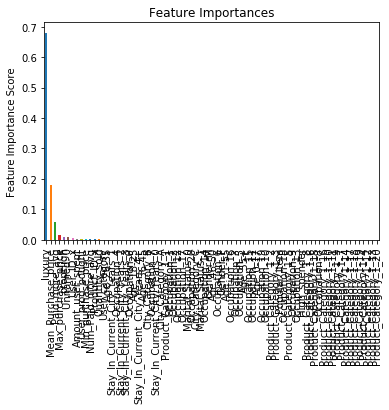

In [37]:
feat_imp = pd.Series(rfr.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

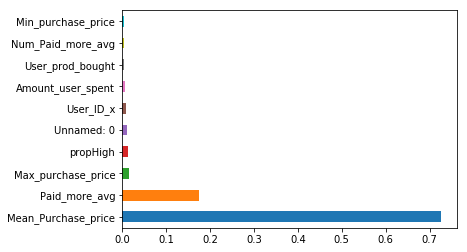

In [55]:
feat_importances = pd.Series(rfr.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')